In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
models = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
#Coordinates along Dutch coast
lons = [6.5,4.5,3.5]
lats = [53.5,52.5,51.5]
cols = ['tab:green','tab:red','tab:blue']
names = ['Groningen','Randstad','Zeeland']

In [4]:
#Function to load single time series
def load_ts(model,scen,lon,lat):
    with xr.open_dataset(f'../data/totalrsl/{model}_{scen}.nc') as ds:
        ds = ds.sel(lat=lat,lon=lon)
        slr = ds['SLR'].values
        time = ds['time'].values
    return time,slr

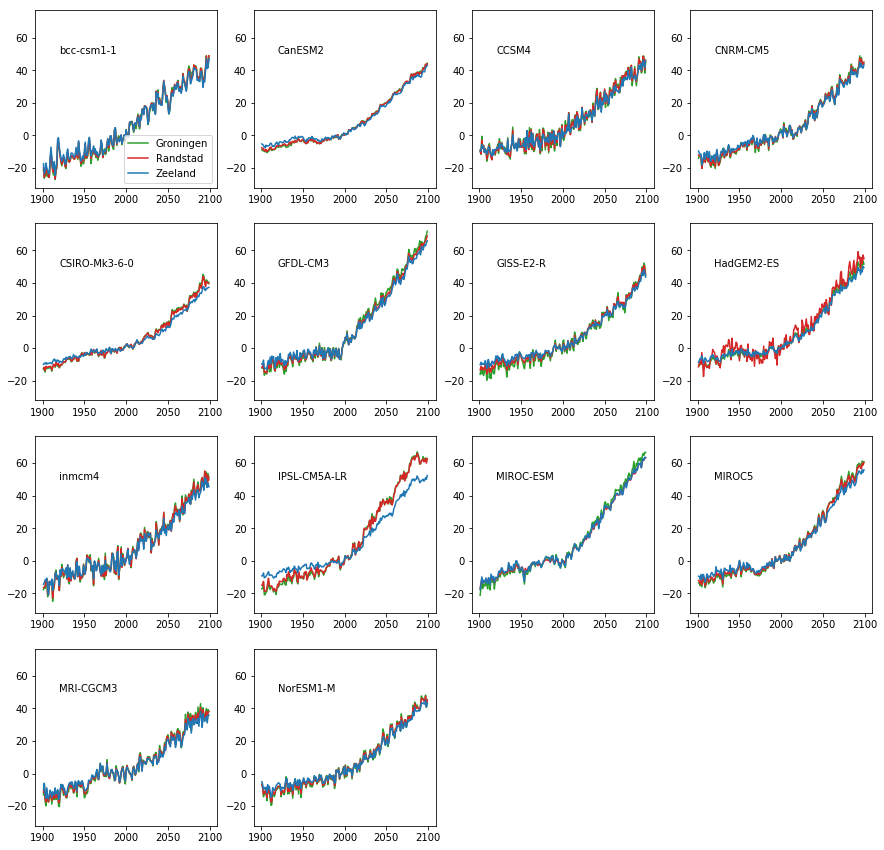

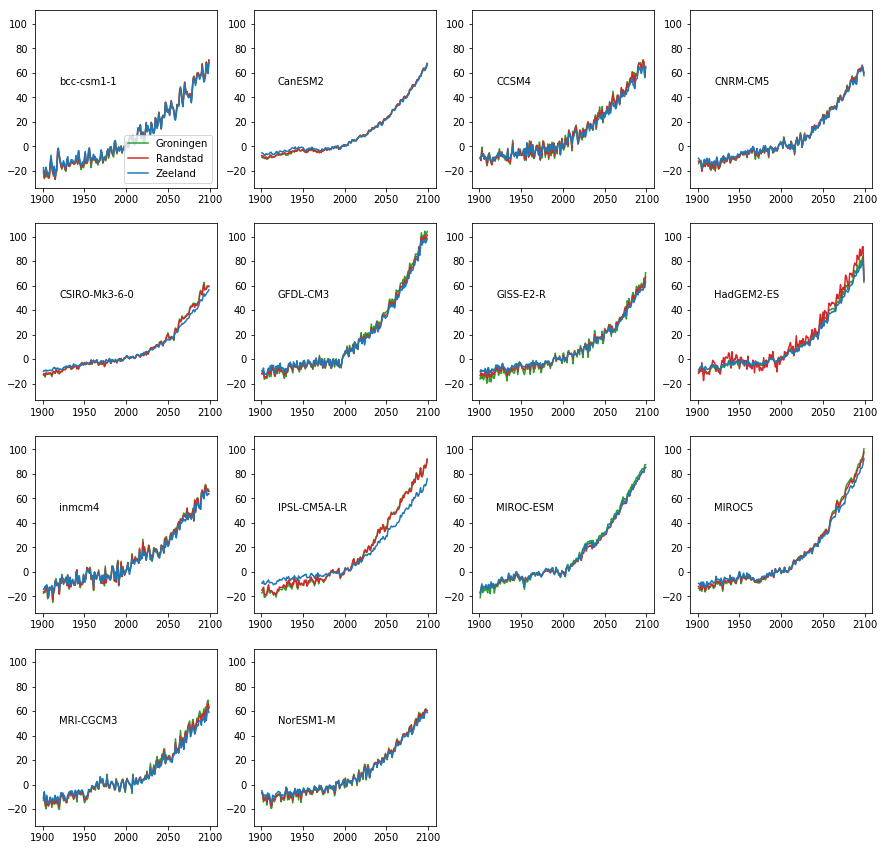

In [5]:
for scen in ['rcp45','rcp85']:
    fig = plt.figure(figsize=(15,15))

    for m,model in enumerate(models):
        if m==0:
            ax = fig.add_subplot(4,4,m+1)
        else:
            ax = fig.add_subplot(4,4,m+1,sharey=ax,sharex=ax)
        for lon,lat,col,name in zip(lons,lats,cols,names):
            time,slr = load_ts(model,scen,lon,lat)
            ax.plot(time,slr,c=col,label=name)
        if m==0:
            ax.legend(loc='lower right')
        ax.text(1920,50,model,ha='left')

    plt.savefig(f'NL_{scen}.png')
    plt.show()